In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-08-22 14:21:20--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-08-22 14:21:20 (57.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1].reshape(-1, 1)

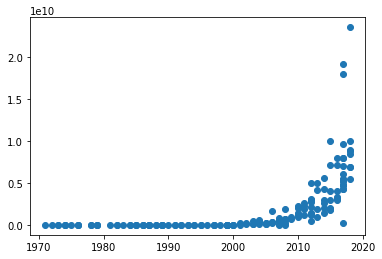

In [4]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

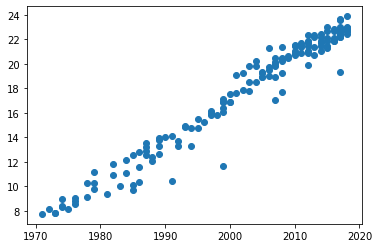

In [5]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y);
# that's better

In [6]:
# Scale and center both the x and y axes
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy

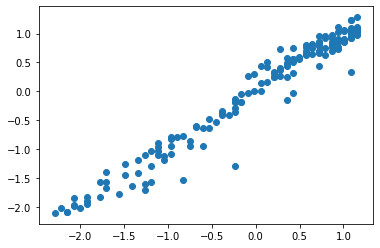

In [ ]:
# Everything is centered and in a small range
plt.scatter(X, Y);

In [7]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [8]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [9]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [10]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [11]:
type(inputs)

torch.Tensor

In [12]:
# Train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 1.8842
Epoch 2/100, Loss: 1.8111
Epoch 3/100, Loss: 1.6916
Epoch 4/100, Loss: 1.5466
Epoch 5/100, Loss: 1.3914
Epoch 6/100, Loss: 1.2363
Epoch 7/100, Loss: 1.0880
Epoch 8/100, Loss: 0.9504
Epoch 9/100, Loss: 0.8257
Epoch 10/100, Loss: 0.7143
Epoch 11/100, Loss: 0.6161
Epoch 12/100, Loss: 0.5304
Epoch 13/100, Loss: 0.4562
Epoch 14/100, Loss: 0.3923
Epoch 15/100, Loss: 0.3376
Epoch 16/100, Loss: 0.2909
Epoch 17/100, Loss: 0.2512
Epoch 18/100, Loss: 0.2175
Epoch 19/100, Loss: 0.1891
Epoch 20/100, Loss: 0.1650
Epoch 21/100, Loss: 0.1447
Epoch 22/100, Loss: 0.1277
Epoch 23/100, Loss: 0.1133
Epoch 24/100, Loss: 0.1012
Epoch 25/100, Loss: 0.0911
Epoch 26/100, Loss: 0.0826
Epoch 27/100, Loss: 0.0754
Epoch 28/100, Loss: 0.0694
Epoch 29/100, Loss: 0.0644
Epoch 30/100, Loss: 0.0602
Epoch 31/100, Loss: 0.0567
Epoch 32/100, Loss: 0.0537
Epoch 33/100, Loss: 0.0512
Epoch 34/100, Loss: 0.0491
Epoch 35/100, Loss: 0.0474
Epoch 36/100, Loss: 0.0460
Epoch 37/100, Loss: 0.0447
Epoch 38/1

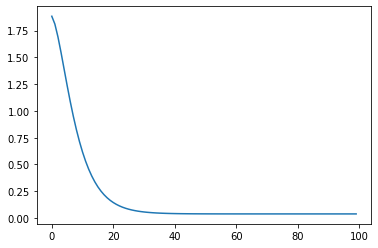

In [13]:
# Loss per iteration
plt.plot(losses);

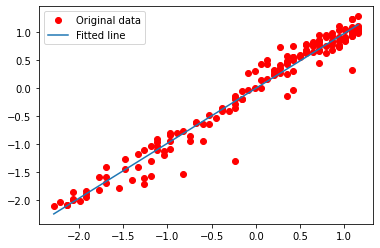

In [14]:
# Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [15]:
# What does this mean?
w = model.weight.data.numpy()
print(w)

[[0.9803454]]


# Transforming back to original scale

Our original hypothesis is that the growth is exponential. This has the form:

$$ C = C_0 r ^ t $$

In this equation, $C$ is the transistor count, $t$ is the year, $C_0$ is the original transistor count at year $0$, and $r$ is the rate of growth.

We made this equation linear by taking the log of both sides.

$$ \log C = \log C_0 + \log r * t $$

Here, $\log C$ represents the variable that goes along the y-axis, and $t$ represents the variable that goes along the x-axis.

In other words, under our hypothesized model, the log of transistor counts is linear with respect to time.

Let us rename the variables to a more familiar form:

$$ y = a x + \log C_0 $$

Now $y=\log C$ represents the log of transistor counts and $x=t$ represents time. $a = \log r$ is the slope and $\log C_0$ is the y-intercept.

# Our Model

We normalized the data as follows:

$$ y' = \frac{y - m_y}{s_y} $$

$$ x' = \frac{x - m_x}{s_x} $$

Here, $m_x$ represents the sample mean of the $x$ data and $s_x$ represens the sample standard deviation of the $x$ data, with analogous definitions for $m_y$ and $s_y$.

Our model looks like:

$$ y' = wx' + b $$

We can recover the original model by substituting $x'$ and $y'$ with corresponding expressions in terms of $x$ and $y$.

$$ \frac{y - m_y}{s_y} = w \frac{x - m_x}{s_x} + b $$

After some algebraic manipulation (try it yourself, it's only high school math), we get:

$$ y = w \frac{s_y}{s_x} x - w \frac{s_y}{s_x} m_x + b s_y + m_y = a x + \log C_0 $$

It is clear that the coefficient in front of $x$ represents our original $a$, and the sum of all the other terms represents $\log C_0$.

We are only interested in the doubling time, so we have found that:

$$ a = w \frac{s_y}{s_x} $$

In [ ]:
a = w[0,0] * sy / sx
print(a)

0.3416760792975696


# Exponential Growth Model

Our equation is currently linear. We still need to find the doubling time.

Our original model for exponential growth is:

$$ C = C_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log C_0 $$

This is our linear equation:

$$ y = ax + \log C_0 $$

Where:

$$ y = \log C $$
$$ a = \log r $$
$$ x = t $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.341659983 $$

so that:

$$ r = e^{0.341659983} = 1.40728 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = C_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = C_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (C_0 r ^ {t'}) / C_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.

In [ ]:
print("Time to double:", np.log(2) / a)

Time to double: 2.028667567202665


# Exercise

What happens when you *don't* normalize the data?

This makes it easier because you no longer need to do the transformation step.

But what happens to the optimization? Can you use the same learning rate as we did originally?